<a href="https://colab.research.google.com/github/SanaSoren/Coronavirus-tweet-sentiment-analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_SanaSoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Type :** Classification

**Team :** Individual

# **Problem Statement**
This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

1. Location
2. Tweet At
3. Original Tweet
4. Label

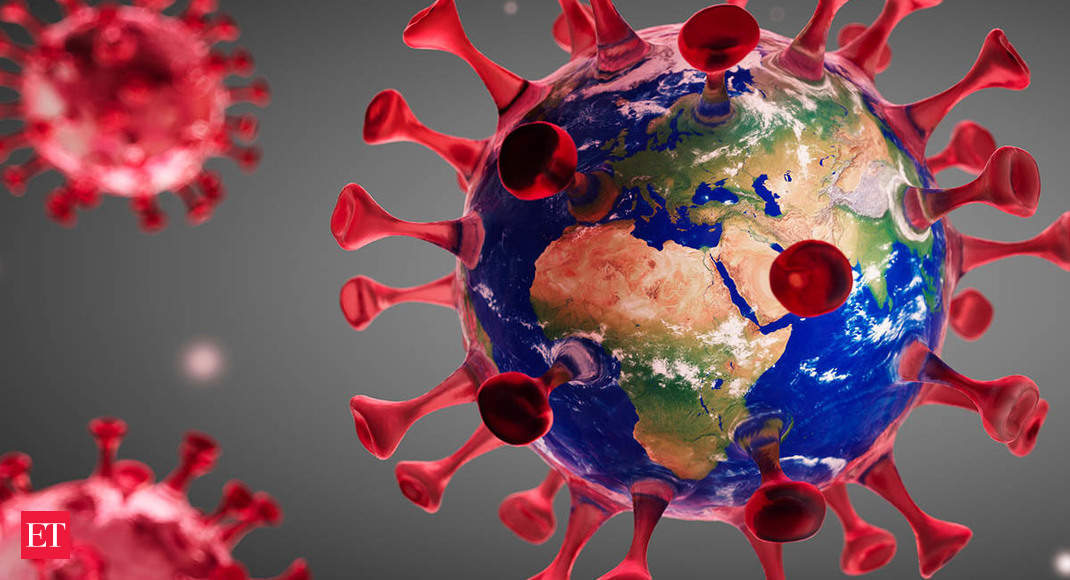

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

## **Importing Important Libraries**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score

from nltk.stem.porter import *
stemmer = PorterStemmer()

#Importing Stop-words
from nltk.corpus import stopwords
stop = stopwords.words('english')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_ML/Coronavirus Tweets.csv', encoding = 'Latin-1')
df = df_original.copy()

# **Understanding Dataset**

In [4]:
pd.concat([df.head(),df.tail()])

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [5]:
# Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
# Checking Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
# For sentiment analysis we only want tweet and sentiment Features
df = df[['OriginalTweet','Sentiment']]

In [8]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
# Stastastical analysis of dataset
df.describe().T

,count,unique,top,freq
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,41157,5,Positive,11422


In [10]:
# checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

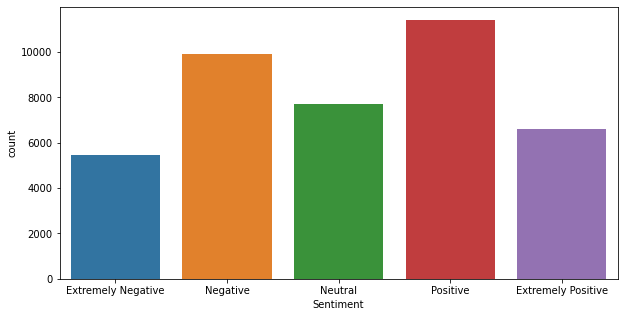

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])

In [12]:
# checking Shape of the dataset
df.shape

(41157, 2)

In [13]:
#check duplicate entries
len(df[df.duplicated()])

0

## **Text Preprocessing** 

Here we will perform a regular expression function to remove any symbols and special characters, etc to get pure data.

In [14]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

In [15]:
df.head()

,OriginalTweet,Sentiment,CleanedTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan https t co iFz9FAn2Pa and https ...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


In [16]:
# function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [17]:
df['CleanedTweet']= df['CleanedTweet'].apply(lambda x: remove_stopwords(x))

In [18]:
df.CleanedTweet[7]

['supermarket',
 'today',
 'buy',
 'toilet',
 'paper',
 '19',
 'https',
 'co',
 'evxkqlidaz']

## **Stemming**

In [19]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [20]:
df['stemmed'] = df['CleanedTweet'].apply(lambda x: stemming(x))

In [21]:
df.stemmed.head()

0    gahan http co ifz9fan2pa http co xx6ghgfzcc ht...
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas panic enough food e...
4    readi go supermarket outbreak paranoid food st...
Name: stemmed, dtype: object

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

## **Lemmetizing**

In [22]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['CleanedTweet'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [23]:
df.head()

,OriginalTweet,Sentiment,CleanedTweet,stemmed,lemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[gahan, https, co, ifz9fan2pa, https, co, xx6g...",gahan http co ifz9fan2pa http co xx6ghgfzcc ht...,"[gahan, http, co, ifz9fan2pa, http, co, xx6ghg..."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug...",food stock one empti pleas panic enough food e...,"[food, stock, one, empty, please, panic, enoug..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, outbreak, paranoid, f...",readi go supermarket outbreak paranoid food st...,"[ready, go, supermarket, outbreak, paranoid, f..."


Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

## **Exploratory Data Analysis**

## Tweet Count For Each Sentiments

In [24]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

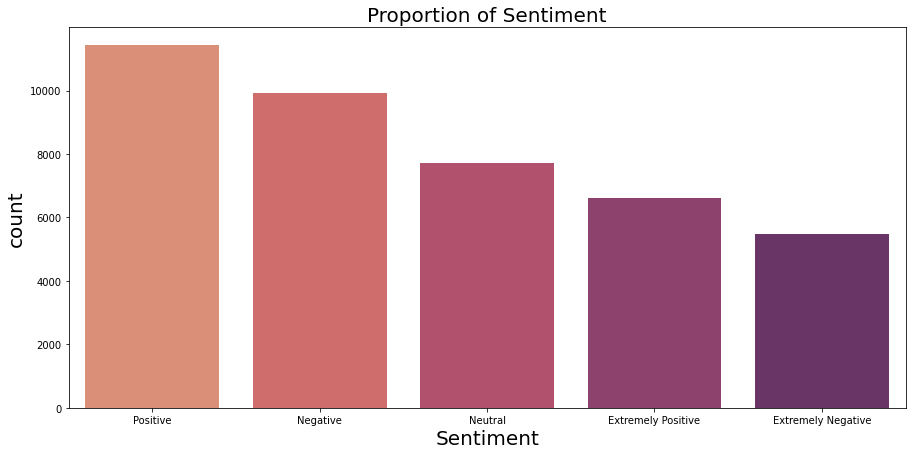

In [25]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count, palette = 'flare')
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

Number of "Positive" sentiments are higher than all other sentiments

In [26]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [27]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


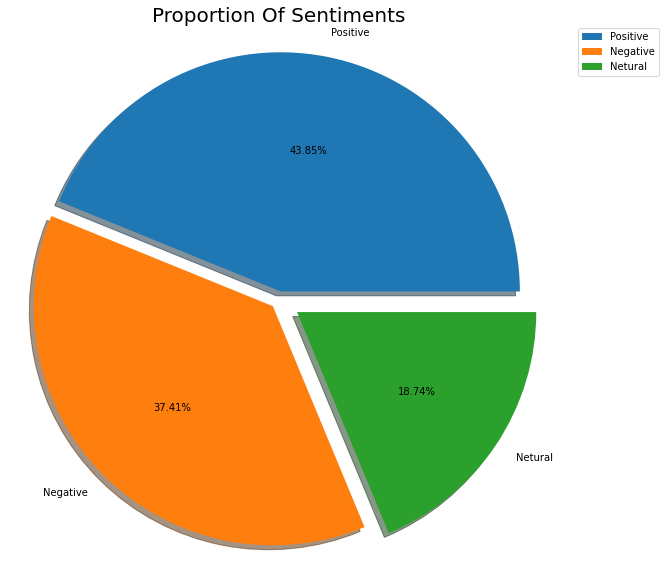

In [28]:
# Plotting the piechart for Sentiments distribution
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(15,10))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

In [29]:
df['temp_list'] = df['CleanedTweet'].apply(lambda x:str(x).split())

In [30]:
from collections import Counter 
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,"'co',",24085
1,"'https',",23797
2,"'19',",12954
3,"'covid',",9502
4,"'prices',",7366
5,"'store',",6665
6,"'food',",6459
7,"'supermarket',",6102
8,"'grocery',",5624
9,"'amp',",5120


Word such as 'Covid' and 'Coronavirus' are having large number of frequency present in our dataset.

## **Making Word Cloud**

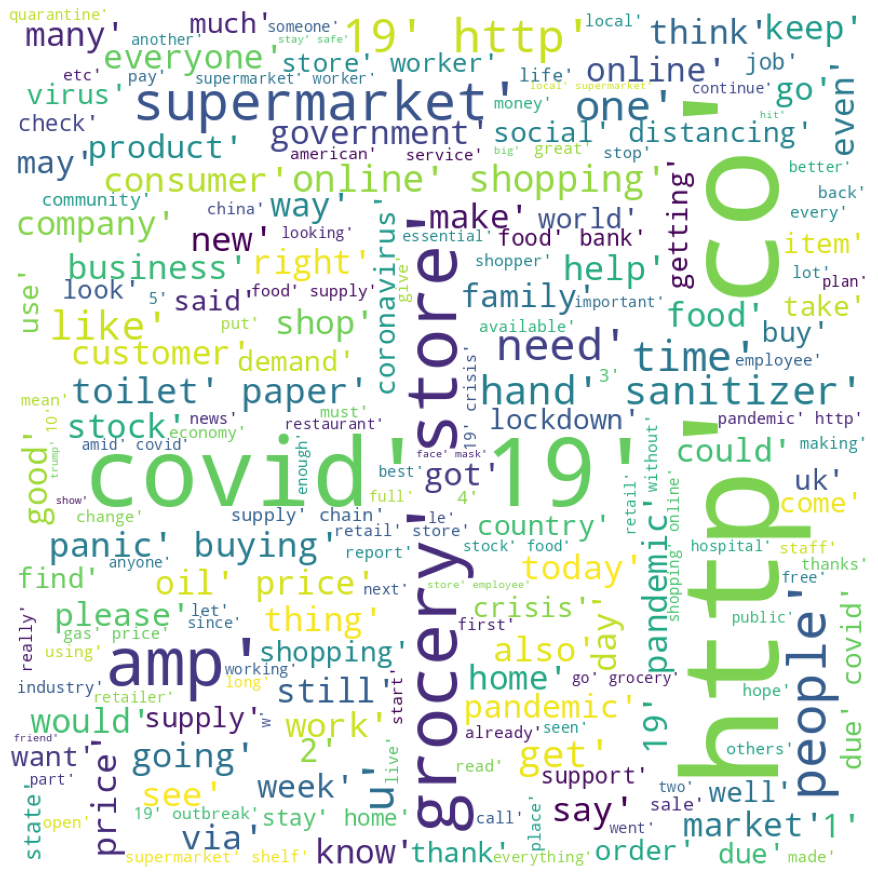

In [31]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
 
# iterate through the csv file
for val in df['lemmed']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

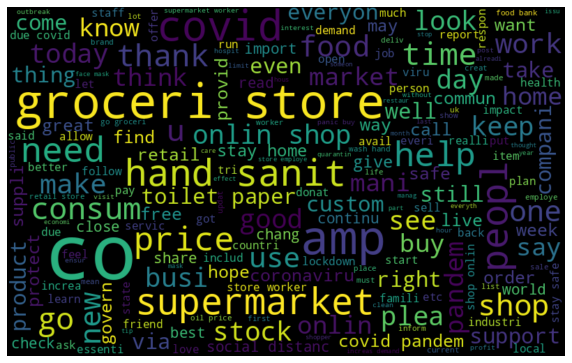

In [32]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['stemmed'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

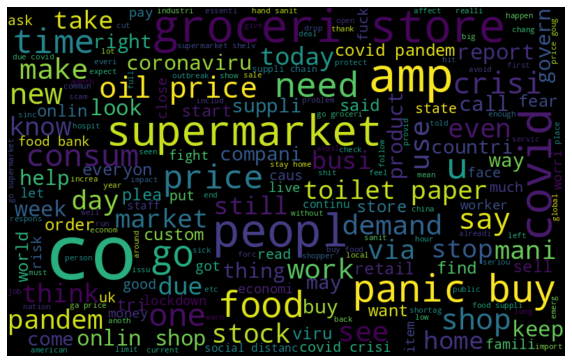

In [33]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['stemmed'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

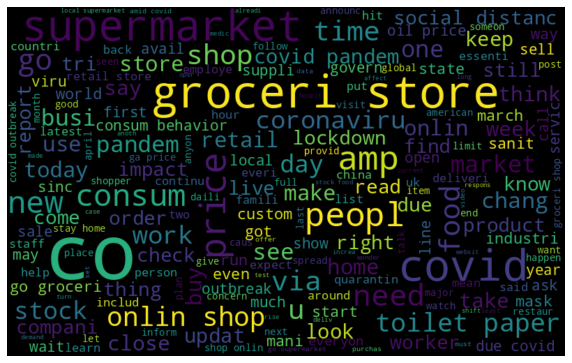

In [34]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['stemmed'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Train-Test Split**

In [35]:
#Assigning dependent and independent features
X= df['lemmed']
y=df['Sentiment']

In [36]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [37]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [38]:
#checking splitted data
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, call, patent, profiteering, drug, t...
24504    [spread, world, leader, get, tough, price, col...
17281    [store, shelf, empty, people, selling, certain...
11488    [normal, night, final, reduction, nothing, cov...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

# **Count Vectorization And TF/IDF Vecorization**

In [39]:
# Count Vectorization
cv = CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train = cv.fit_transform(X_train.astype(str).str.strip())

In [40]:
# TF-IDF
tv = TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train = tv.fit_transform(X_train.astype(str).str.strip())

In [41]:
tv_X_train.shape

(28809, 16131)

In [42]:
cv_X_test = cv.transform(X_test.astype(str).str.strip())
tv_X_test = tv.transform(X_test.astype(str).str.strip())

## **Implementing Models by Count Vectoriser** :
> **1. Logistic Regression Count Vectoriser Method with GridsearchCV**

In [43]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [44]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [45]:
pred_lr_cv

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [46]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7997246517654681


In [47]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      4620
     Neutral       0.69      0.74      0.71      2314
    Positive       0.84      0.83      0.84      5414

    accuracy                           0.80     12348
   macro avg       0.78      0.79      0.78     12348
weighted avg       0.80      0.80      0.80     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

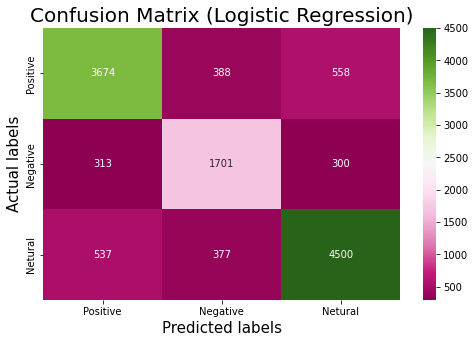

In [48]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax, cmap = 'PiYG')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

> **This model gives an accuracy score of 78.28% which implies that our model is performing well.**

> **2. SVM with CV**

In [49]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [50]:
pred_svm_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [51]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7698412698412699


In [52]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77      4620
     Neutral       0.67      0.70      0.68      2314
    Positive       0.80      0.81      0.81      5414

    accuracy                           0.77     12348
   macro avg       0.75      0.76      0.75     12348
weighted avg       0.77      0.77      0.77     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

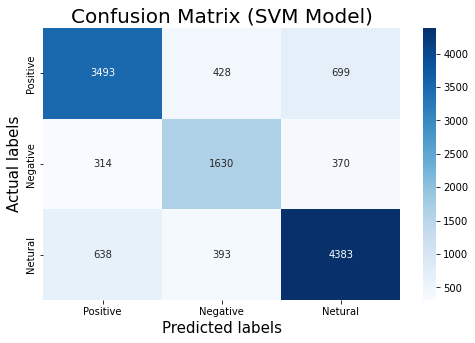

In [53]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax, cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM Model)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

> **This model gives an accuracy score of 76% which implies that our model is performing well.**

> **3. DecisionTree Classifier with CV**

In [54]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [55]:
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [56]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6897143240334459


In [57]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.70      0.67      0.68      4620
     Neutral       0.61      0.68      0.65      2314
    Positive       0.75      0.74      0.74      5414

    accuracy                           0.70     12348
   macro avg       0.69      0.70      0.69     12348
weighted avg       0.70      0.70      0.70     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

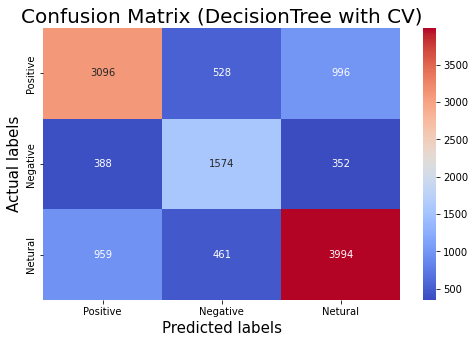

In [58]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax, cmap = 'coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (DecisionTree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


> **This model gives an accuracy score of 69.04% which implies that our model is performing well.**

## **Implementing Models by TF/IDF Vectorizer**
> **1. Logistic Regression TF/IDF vectorizer with GridsearchCV**

In [59]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [60]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [61]:
pred_lr_tv_Gcv

array(['Positive', 'Negative', 'Positive', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [62]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7961613216715258


In [63]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      4620
     Neutral       0.71      0.68      0.69      2314
    Positive       0.82      0.84      0.83      5414

    accuracy                           0.80     12348
   macro avg       0.78      0.77      0.78     12348
weighted avg       0.80      0.80      0.80     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

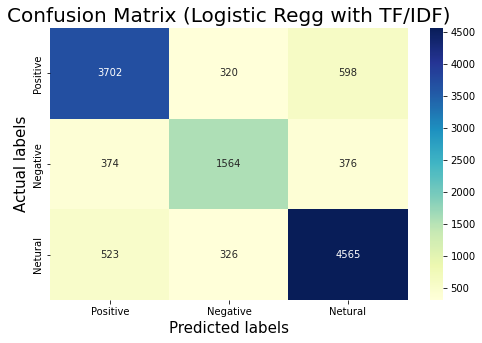

In [64]:
#Plotting Confussion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

> **This model gives an accuracy score of 77% which implies that our model is performing well.**

> **2.SVM with TF/IDF**

In [65]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [66]:
pred_svm_tv

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [67]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

Accuracy : 0.7763200518302559


In [68]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79      4620
     Neutral       0.74      0.56      0.63      2314
    Positive       0.79      0.85      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.77      0.74      0.75     12348
weighted avg       0.77      0.78      0.77     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

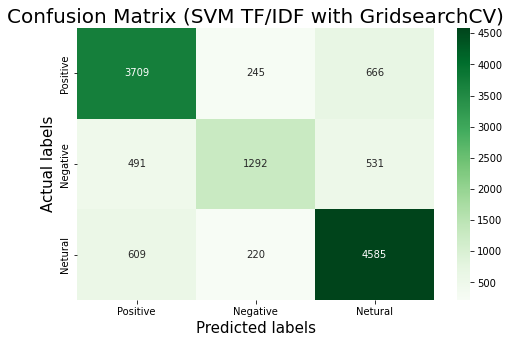

In [69]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax, cmap = "Greens")

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

> **This model gives an accuracy score of 76% which implies that our model is performing well.**

> **3. DecisionTree Classifier With TF/IDF**

In [70]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [71]:
pred_dt_tv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [72]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6157101748396033


In [73]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.64      0.62      0.63      4620
     Neutral       0.49      0.57      0.53      2314
    Positive       0.70      0.67      0.68      5414

    accuracy                           0.63     12348
   macro avg       0.61      0.62      0.61     12348
weighted avg       0.64      0.63      0.63     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

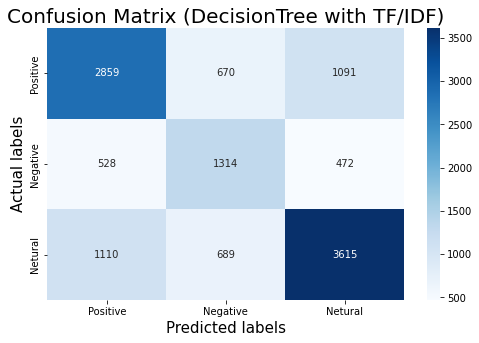

In [74]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax, cmap = "Blues")

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (DecisionTree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

> This model gives an accuracy score of 60% which implies that our model is performing well.

In [75]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','Support-Vector-Machine Classifier'],
        'Count Vector': [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_svc],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Logistic Regression with GridserachCV,0.799725,0.796161
1,Decision Tree Classifier,0.689714,0.615710
2,Support-Vector-Machine Classifier,0.769841,0.776320


# **Conclusions:**
1. We applied 3 different machine learing models namely, Logistic Regression with Grid Search CV, DecisionTree Classifier, SVM Classifier for both Count Vector And TF IDF Vectorisation techniques.
2. We conclude that the machine is generating best results for Logistic Regression with Grid Search CV model with and Accuracy score of 78.28% and 77.43% respectively for Count vector and TF/idf Vector, followed by SVM
3. Also, we observed that no overfitting is seen for the data, and we can deploy this model.
4. The sentiments of future tweets can be easily predicted using this model.